In [92]:
import json

# Access JSON file with connection string

with open('G:\\My Drive\\School\\DATA 320\\readonly-credentials.json') as f:
    # Load the JSON data from the file.
    data = json.load(f)

    # Extract the readonly_key from the JSON data.
    readonly_key = data['readonly_key']

# Print a message indicating that the readonly_key was successfully retrieved.
print(f'My Secret key of {len(readonly_key)} length successfully retrieved!')


My Secret key of 71 length successfully retrieved!


In [93]:
import pymongo
import certifi

# Connect to MongoDB Database with string.
mongo_connection_string = data['readonly_key']

client = pymongo.MongoClient(mongo_connection_string, tlsCAFile=certifi.where())

da320_database = client['ASSIGNMENT_NOSQL_DATABASES']

allCollections = da320_database.list_collection_names()

# Verify database version and collection.
print(f"Using MongoDB version {client.server_info()['version']}.")
print(f"This database has the collections {allCollections}")


Using MongoDB version 6.0.11.
This database has the collections ['imdb_superhero_2', 'imdb', 'metacritic_movies', 'IMDB']


In [94]:
import pandas as pd

# Retrieve all records from a collection - this can be a large amount of data!
cursor = da320_database["imdb"].find()

# Convert this information into a Pandas dataframe.
metacritic = pd.DataFrame(cursor)

# Make sure we've read the information correctly.
metacritic.head()

,_id,id,title,runtime,user_rating,votes,mpaa_rating,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company
0,652df3f4e11765e61cda0282,77631,Grease,110,7.2,265183,TV-14::(D),6/13/1978,6000000,60759,394955690,"Comedy, Musical, Romance","John Travolta, Olivia Newton-John, Stockard Ch...",Randal Kleiser,"Allan Carr, Neil A. Machlis, Robert Stigwood","Paramount Pictures, Robert Stigwood Organizati..."
1,652df3f4e11765e61cda0285,77651,Halloween,91,7.7,267109,TV-14,10/25/1978,300000,NULL,70000000,"Horror, Thriller","Donald Pleasence, Jamie Lee Curtis, Nancy Kyes...",John Carpenter,"Moustapha Akkad, John Carpenter, Debra Hill, K...","Compass International Pictures, Falcon Interna..."
2,652df3f4e11765e61cda0287,77327,"China 9, Liberty 37",102,6.0,1212,R,8/4/1978,NULL,NULL,NULL,"Romance, Western","Warren Oates, Fabio Testi, Jenny Agutter, Sam ...","Monte Hellman, Tony Brandt","Gianni Bozzacchi, Valerio De Paolis, Rolf M. D...","Aspa Producciones, Compagnia Europea Cinematog..."
3,652df3f4e11765e61cda0288,77413,Death on the Nile,140,7.2,34243,PG,6/20/1978,7920000,NULL,784489,"Crime, Drama, Mystery","Peter Ustinov, Jane Birkin, Lois Chiles, Bette...",John Guillermin,"John Brabourne, Richard Goodwin, Norton Knatch...","Mersham Productions Ltd., EMI Films"
4,652df3f4e11765e61cda0286,77975,National Lampoon's Animal House,109,7.4,119917,"TV-14::(DLSV, TV Rating.)",7/27/1978,3000000,201747,3371006,Comedy,"Tom Hulce, Stephen Furst, Mark Metcalf, Mary L...",John Landis,"Ivan Reitman, Matty Simmons","Universal Pictures, Oregon Film Factory, Stage..."


In [95]:
import pandas

# Access the 'imdb' collection.
cursor = da320_database['imdb'].find()

# Create a Pandas DataFrame using the data retrieved.
imdb = pd.DataFrame(cursor)

# Preview Dataframe.
imdb.head()

,_id,id,title,runtime,user_rating,votes,mpaa_rating,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company
0,652df3f4e11765e61cda0282,77631,Grease,110,7.2,265183,TV-14::(D),6/13/1978,6000000,60759,394955690,"Comedy, Musical, Romance","John Travolta, Olivia Newton-John, Stockard Ch...",Randal Kleiser,"Allan Carr, Neil A. Machlis, Robert Stigwood","Paramount Pictures, Robert Stigwood Organizati..."
1,652df3f4e11765e61cda0285,77651,Halloween,91,7.7,267109,TV-14,10/25/1978,300000,NULL,70000000,"Horror, Thriller","Donald Pleasence, Jamie Lee Curtis, Nancy Kyes...",John Carpenter,"Moustapha Akkad, John Carpenter, Debra Hill, K...","Compass International Pictures, Falcon Interna..."
2,652df3f4e11765e61cda0287,77327,"China 9, Liberty 37",102,6.0,1212,R,8/4/1978,NULL,NULL,NULL,"Romance, Western","Warren Oates, Fabio Testi, Jenny Agutter, Sam ...","Monte Hellman, Tony Brandt","Gianni Bozzacchi, Valerio De Paolis, Rolf M. D...","Aspa Producciones, Compagnia Europea Cinematog..."
3,652df3f4e11765e61cda0288,77413,Death on the Nile,140,7.2,34243,PG,6/20/1978,7920000,NULL,784489,"Crime, Drama, Mystery","Peter Ustinov, Jane Birkin, Lois Chiles, Bette...",John Guillermin,"John Brabourne, Richard Goodwin, Norton Knatch...","Mersham Productions Ltd., EMI Films"
4,652df3f4e11765e61cda0286,77975,National Lampoon's Animal House,109,7.4,119917,"TV-14::(DLSV, TV Rating.)",7/27/1978,3000000,201747,3371006,Comedy,"Tom Hulce, Stephen Furst, Mark Metcalf, Mary L...",John Landis,"Ivan Reitman, Matty Simmons","Universal Pictures, Oregon Film Factory, Stage..."


In [96]:
import pandas as pd
import re

# Define your query in MongoDB Compass, on the website, or using any other available MongoDB program.
query = {'release_date': re.compile(r"1988$")
}

# Execute this query and produce a cursor.
cursor = da320_database["imdb"].find(query)

# Convert this information into a Pandas dataframe.
filtered_imdb = pd.DataFrame(cursor)

# Make sure we've read the information correctly.
filtered_imdb.head()

,_id,id,title,runtime,user_rating,votes,mpaa_rating,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company
0,652df3f6e11765e61cda0cb6,96487,Young Guns,107,6.8,61077,R,8/10/1988,13000000,7011393,NULL,"Action, Western","Emilio Estevez, Kiefer Sutherland, Lou Diamond...",Christopher Cain,"Christopher Cain, John Fusco, James G. Robinso...",Morgan Creek Entertainment
1,652df3f6e11765e61cda0cb7,95489,The Land Before Time,69,7.4,87771,G,11/12/1988,12500000,7526025,84460846,"Animation, Adventure, Drama, Family","Pat Hingle, Helen Shaver, Gabriel Damon, Bill ...",Don Bluth,"Don Bluth, Gary Goldman, Kathleen Kennedy, Geo...","Lucasfilm, Universal Pictures, Sullivan Bluth ..."
2,652df3f6e11765e61cda0cd3,94964,Dead Ringers,116,7.2,46481,R,9/8/1988,13000000,NULL,NULL,"Drama, Horror, Thriller","Jeremy Irons, Geneviève Bujold, Heidi von Pall...",David Cronenberg,"Carol Baum, John Board, Marc Boyman, David Cro...","Morgan Creek Entertainment, Téléfilm Canada, M..."
3,652df3f6e11765e61cda0cd5,94862,Child's Play,87,6.6,99964,R,11/9/1988,9000000,6583000,10952000,"Horror, Thriller","Catherine Hicks, Chris Sarandon, Alex Vincent,...",Tom Holland,"Elliot Geisinger, David Kirschner, Laura Mosko...",United Artists
4,652df3f6e11765e61cda0cd6,96163,The Vanishing,107,7.7,38485,Not Rated,8/29/1988,NULL,NULL,NULL,"Mystery, Thriller","Bernard-Pierre Donnadieu, Gene Bervoets, Johan...",George Sluizer,"Anne Lordon, George Sluizer","Argos Films, Co-Productiefonds Binnenlandse Om..."


In [97]:
# Convert the 'release_date' column to datetime format.
filtered_imdb.release_date = pd.to_datetime(filtered_imdb.release_date, errors='coerce')

# Convert the 'budget' and 'runtime' columns to numeric format.
filtered_imdb.budget = pd.to_numeric(filtered_imdb.budget, errors='coerce')
filtered_imdb.runtime = pd.to_numeric(filtered_imdb.runtime, errors='coerce')

# Preview Dataset.
filtered_imdb.head()

,_id,id,title,runtime,user_rating,votes,mpaa_rating,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company
0,652df3f6e11765e61cda0cb6,96487,Young Guns,107,6.8,61077,R,1988-08-10,13000000.0,7011393,NULL,"Action, Western","Emilio Estevez, Kiefer Sutherland, Lou Diamond...",Christopher Cain,"Christopher Cain, John Fusco, James G. Robinso...",Morgan Creek Entertainment
1,652df3f6e11765e61cda0cb7,95489,The Land Before Time,69,7.4,87771,G,1988-11-12,12500000.0,7526025,84460846,"Animation, Adventure, Drama, Family","Pat Hingle, Helen Shaver, Gabriel Damon, Bill ...",Don Bluth,"Don Bluth, Gary Goldman, Kathleen Kennedy, Geo...","Lucasfilm, Universal Pictures, Sullivan Bluth ..."
2,652df3f6e11765e61cda0cd3,94964,Dead Ringers,116,7.2,46481,R,1988-09-08,13000000.0,NULL,NULL,"Drama, Horror, Thriller","Jeremy Irons, Geneviève Bujold, Heidi von Pall...",David Cronenberg,"Carol Baum, John Board, Marc Boyman, David Cro...","Morgan Creek Entertainment, Téléfilm Canada, M..."
3,652df3f6e11765e61cda0cd5,94862,Child's Play,87,6.6,99964,R,1988-11-09,9000000.0,6583000,10952000,"Horror, Thriller","Catherine Hicks, Chris Sarandon, Alex Vincent,...",Tom Holland,"Elliot Geisinger, David Kirschner, Laura Mosko...",United Artists
4,652df3f6e11765e61cda0cd6,96163,The Vanishing,107,7.7,38485,Not Rated,1988-08-29,NaN,NULL,NULL,"Mystery, Thriller","Bernard-Pierre Donnadieu, Gene Bervoets, Johan...",George Sluizer,"Anne Lordon, George Sluizer","Argos Films, Co-Productiefonds Binnenlandse Om..."


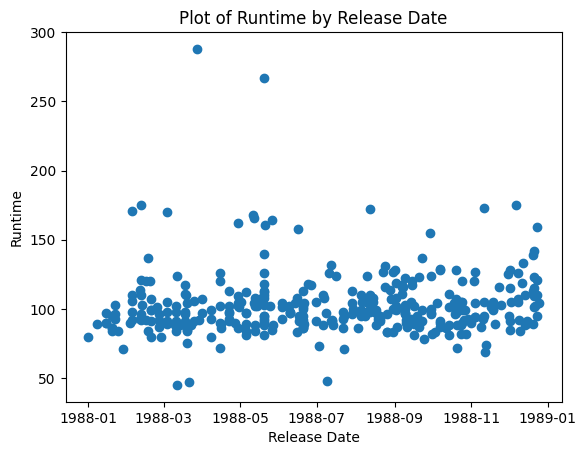

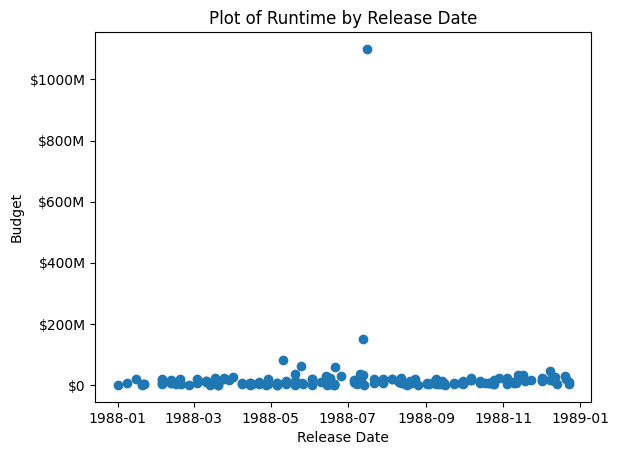

In [98]:
from matplotlib import pyplot

# Plot runtimes in a scatterplot.
pyplot.title('Plot of Runtime by Release Date')
pyplot.xlabel('Release Date')
pyplot.ylabel('Runtime')
pyplot.scatter(filtered_imdb['release_date'], filtered_imdb['runtime'])
pyplot.show()


# A custom formatter for currency.
def format_currency(amount, _):
    if amount > 1_000_000_000_000:
        return f"${round(amount / 1_000_000_000_000)}T"
    elif amount > 1_000_000_000:
        return f"${round(amount / 1_000_000_000)}B"
    elif amount > 1_000_000:
        return f"${round(amount / 1_000_000)}M"
    elif amount > 1_000:
        return f"${round(amount / 1_000)}K"
    else:
        return f"${round(amount)}"

# Plot budget in a scatterplot.
pyplot.title('Plot of Runtime by Release Date')
pyplot.xlabel('Release Date')
pyplot.ylabel('Budget')
pyplot.scatter(filtered_imdb['release_date'],  filtered_imdb['budget'])
pyplot.gca().yaxis.set_major_formatter(format_currency)
pyplot.show()


In [99]:
# Sort Dataset by runtime in descending order to observe outlier.
filtered_imdb.sort_values(by=['runtime'], inplace=True, ascending=False)

filtered_imdb.head()

,_id,id,title,runtime,user_rating,votes,mpaa_rating,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company
219,652df3f6e11765e61cda0ded,96403,Time of Violence,288,9.0,2189,R,1988-03-28,NaN,NULL,NULL,Drama,"Max Freeman, Rousy Chanev, Ivan Krystev, Anya ...",Ludmil Staikov,Christo Nenov,Boyana Film
263,652df3f6e11765e61cda0dec,95341,Hôtel Terminus,267,7.6,1465,Unrated,1988-05-20,NaN,NULL,NULL,"Documentary, Biography, History, War","Johannes Schneider-Merck, Raymond Lévy, Marcel...",Marcel Ophüls,"Bernard Farrel, Hamilton Fish, John S. Friedma...",The Memory Pictures Company
97,652df3f6e11765e61cda0d89,93949,Shahenshah,175,6.3,2162,NULL,1988-02-12,NaN,NULL,NULL,"Action, Adventure","Amitabh Bachchan, Meenakshi Sheshadri, Rohini ...",Tinnu Anand,"Bitu Anand, Tinnu Anand, Naresh Malhotra",Film Vision
292,652df3f6e11765e61cda0d67,94828,Camille Claudel,175,7.2,6804,R,1988-12-07,NaN,NULL,NULL,"Biography, Drama, History, Romance","Isabelle Adjani, Gérard Depardieu, Madeleine R...",Bruno Nuytten,"Isabelle Adjani, Bernard Artigues, Christian F...","Les Films Christian Fechner, Lilith Films I.A...."
299,652df3f6e11765e61cda0db1,96252,Tezaab,173,6.9,2232,Not Rated,1988-11-11,NaN,NULL,NULL,"Action, Drama, Romance","Anil Kapoor, Madhuri Dixit, Anupam Kher, Chunk...",N. Chandra,N. Chandra,", , , ,"


In [100]:
# Sort Dataset by budget in descending order to observe outlier.
filtered_imdb.sort_values(by=['budget'], inplace=True, ascending=False)

filtered_imdb.head()

,_id,id,title,runtime,user_rating,votes,mpaa_rating,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company
227,652df3f6e11765e61cda0cbd,94625,Akira,124,8.0,182241,"TV-MA::(L, V)",1988-07-16,1.100000e+09,NULL,80000000,"Animation, Action, Drama, Fantasy, Sci-Fi, Thr...","Mitsuo Iwata, Nozomu Sasaki, Mami Koyama, Tess...",Katsuhiro Ôtomo,"Shunzo Kato, Yoshimasa Mizuo, Sawako Noma, Ryo...","Akira Committee Company Ltd., Akira Studio, TM..."
345,652df3f6e11765e61cda0daf,156706,Zombie 5: Killing Birds,92,3.4,1662,Not Rated,1988-07-13,1.500000e+08,NULL,NULL,"Horror, Mystery","Lara Wendel, Robert Vaughn, Timothy W. Watts, ...","Claudio Lattanzi, Joe D'Amato",Joe D'Amato,"Filmirage, Flora Film"
272,652df3f6e11765e61cda0ccb,95250,The Big Blue,168,7.5,51370,PG,1988-05-11,8.000000e+07,NULL,NULL,"Adventure, Drama, Sport","Rosanna Arquette, Jean-Marc Barr, Jean Reno, P...",Luc Besson,"Claude Besson, Luc Besson, Monty Diamond, Bern...","Gaumont, Les Films du Loup"
313,652df3f6e11765e61cda0cb8,95956,Rambo III,102,5.8,130133,TV-14,1988-05-25,6.300000e+07,16745418,189015611,"Action, Adventure, Thriller","Sylvester Stallone, Richard Crenna, Marc de Jo...",Peter MacDonald,"Buzz Feitshans, Mario Kassar, Tony Munafo, And...",Carolco Pictures
54,652df3f6e11765e61cda0cac,96438,Who Framed Roger Rabbit,104,7.7,198069,TV-14,1988-06-21,5.816600e+07,NULL,349200000,"Animation, Adventure, Comedy, Crime, Family, F...","Bob Hoskins, Christopher Lloyd, Joanna Cassidy...",Robert Zemeckis,"Alan Dewhurst, Don Hahn, Kathleen Kennedy, Fra...","Touchstone Pictures, Amblin Entertainment, Sil..."


Finding Nemo... I Mean Outliers:

Selected Year: 1988

Outliers: Akira (Budget), Time of Violence (Runtime), Hotel Terminus (Runtime)

 

I adopted a straightforward and visual approach to detecting outliers. Utilizing scatterplots, I visualized budget and runtime data by their release dates, which facilitated the identification of movies deviating from the norm. Subsequently, I implemented a straightforward sorting code on my filtered dataset in descending order. This approach was chosen as all the outliers I identified exhibited significant discrepancies, specifically in budget and runtime. To validate the accuracy of my movie selection, I cross-referenced the scatterplots to confirm that the chosen movies fell within the same date range by month.

Upon delving into the budget outlier, Akira, I uncovered that the budget was denominated in Japanese Yen, without being converted to US Dollars. This raises concerns regarding the accuracy of budget information for several movies in the dataset. I propose the addition of a currency field in the database to standardize currency conversion for analysis purposes. Additionally, an articleLinks to an external site. I encountered disputes the claimed production cost of 1.1 billion Yen for the Akira movie, a figure significantly out of line with other films. The nearest budget comparison numerically was Zombie 5: Killing Birds, with a budget of 150 million, also listed in a foreign currency (Italian Lira, ITL).

In the case of runtime outliers, "Time of Violence," a Bulgarian movie released in two parts with a combined runtime exceeding 4 hours, deviates significantly from standard movie runtimes. Furthermore, "Hotel Terminus," a documentary about Nazi Officer Klaus Barbie, features a runtime of over 4 hours. Both movies qualify as outliers solely based on their total runtime; however, one might argue for the exclusion of "Time of Violence" from the analysis due to its multipart structure.